In [1]:
# Import dependencies
import nibabel as nib
import numpy as np
import cv2
import scipy.io
import os
import imageio
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.cluster import DBSCAN

In [29]:
import time

In [2]:
%matplotlib notebook

In [3]:
def from_hull_to_ct_coords(ct_coords, nifti):
    """
    Converts the coordinates from the hull to the coordinates of the CT scan
    Args:
        ct_coords np.ndarray float (N,3)
        nifti nibabel.nifti1.Nifti1Image  
    Returns
        ct_coords np.ndarray float (N,3)
    """
    Tmatrix = np.transpose(np.linalg.inv(nifti.affine))
    ct_coords = np.hstack((ct_coords, np.ones((ct_coords.shape[0],1)))) @ Tmatrix
    return ct_coords[:,0:3]

In [19]:
root_dir="../data"
SAMPLE_NAME = f"../data/DBS_bT20"
NIFTI_PATH = os.path.join(SAMPLE_NAME,"postop_ct.nii")
nifti = nib.load(NIFTI_PATH)
nifti_data = np.nan_to_num(np.array(nifti.get_fdata()))
#GT = np.load(os.path.join(SAMPLE_NAME,"load_coords.npy"))
#GT = from_hull_to_ct_coords(GT, nifti)

In [38]:
get_lead(nifti_data)

[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[[  0.   0.   0.]
 [131.  93.  16.]]
[[  0.   0.   0.]
 [131.  93.  16.]
 [140.  97.  17.]]
[[  0.   0.   0.]
 [131.  93.  16.]
 [140.  97.  17.]
 [148.  93.  18.]]
[[  0.   0.   0.]
 [131.  93.  16.]
 [140.  97.  17.]
 [148.  93.  18.]
 [119. 112.  19.]]
[[  0.   0.   0.]
 [131.  93.  16.]
 [140.  97.  17.]
 [148.  93.  18.]
 [119. 112.  19.]
 [159.  86.  20.]]
[[  0.   0.   0.]
 [131.  93.  16.]
 [140.  97.  17.]
 [148.  93.  18.]
 [119. 112.  19.]
 [159.  86.  20.]
 [125.  99.  21.]]
[[  0.   0.   0.]
 [131.  93.  16.]
 [140.  97.  17.]
 [148.  93.  18.]
 [119. 112.  19.]
 [159.  86.  20.]
 [125.  99.  21.]
 [125.  99.  22.]]
[[  0.   0.   0.]
 [131.  93.  16.]
 [140.  97.  17.]
 [148.  93.  18.]
 [119. 112.  19.]
 [159.  86.  20.]
 [125.  99.  21.]
 [125.  99.  22.]
 [143.  99.  23.]]
[[  0.   0.   0.]
 [131.  93.  16.]
 [140.  97.  17.]
 [148.  93.  18.]


[[  0.   0.   0.]
 [131.  93.  16.]
 [140.  97.  17.]
 [148.  93.  18.]
 [119. 112.  19.]
 [159.  86.  20.]
 [125.  99.  21.]
 [125.  99.  22.]
 [143.  99.  23.]
 [142.  96.  24.]
 [121.  96.  25.]
 [112. 100.  26.]
 [114.  87.  27.]
 [106.  94.  28.]
 [103.  94.  29.]
 [102.  89.  30.]
 [145.  65.  31.]
 [144.  64.  32.]
 [148.  65.  33.]
 [150.  61.  34.]
 [158.  63.  35.]
 [141.  61.  36.]
 [137. 141.  37.]
 [148.  54.  38.]
 [145. 139.  39.]
 [149. 144.  40.]
 [148. 145.  41.]
 [139. 145.  42.]
 [145. 146.  43.]
 [142. 146.  44.]
 [213.  88.  45.]
 [213. 111.  46.]
 [213. 115.  47.]
 [ 87.  60.  48.]
 [ 74.  74.  49.]
 [214.  75.  50.]
 [217.  80.  51.]
 [216.  75.  52.]
 [219.  81.  53.]
 [179. 159.  54.]
 [180. 159.  55.]
 [184. 160.  56.]
 [183. 158.  57.]
 [181. 159.  58.]
 [183. 159.  59.]
 [180. 164.  60.]
 [177. 164.  61.]
 [186. 162.  62.]
 [179. 164.  63.]
 [182. 164.  64.]
 [183. 164.  65.]
 [189. 163.  66.]
 [185. 165.  67.]
 [186. 165.  68.]
 [187. 165.  69.]
 [193. 164

[[  0.   0.   0.]
 [131.  93.  16.]
 [140.  97.  17.]
 [148.  93.  18.]
 [119. 112.  19.]
 [159.  86.  20.]
 [125.  99.  21.]
 [125.  99.  22.]
 [143.  99.  23.]
 [142.  96.  24.]
 [121.  96.  25.]
 [112. 100.  26.]
 [114.  87.  27.]
 [106.  94.  28.]
 [103.  94.  29.]
 [102.  89.  30.]
 [145.  65.  31.]
 [144.  64.  32.]
 [148.  65.  33.]
 [150.  61.  34.]
 [158.  63.  35.]
 [141.  61.  36.]
 [137. 141.  37.]
 [148.  54.  38.]
 [145. 139.  39.]
 [149. 144.  40.]
 [148. 145.  41.]
 [139. 145.  42.]
 [145. 146.  43.]
 [142. 146.  44.]
 [213.  88.  45.]
 [213. 111.  46.]
 [213. 115.  47.]
 [ 87.  60.  48.]
 [ 74.  74.  49.]
 [214.  75.  50.]
 [217.  80.  51.]
 [216.  75.  52.]
 [219.  81.  53.]
 [179. 159.  54.]
 [180. 159.  55.]
 [184. 160.  56.]
 [183. 158.  57.]
 [181. 159.  58.]
 [183. 159.  59.]
 [180. 164.  60.]
 [177. 164.  61.]
 [186. 162.  62.]
 [179. 164.  63.]
 [182. 164.  64.]
 [183. 164.  65.]
 [189. 163.  66.]
 [185. 165.  67.]
 [186. 165.  68.]
 [187. 165.  69.]
 [193. 164

[[  0.   0.   0.]
 [131.  93.  16.]
 [140.  97.  17.]
 [148.  93.  18.]
 [119. 112.  19.]
 [159.  86.  20.]
 [125.  99.  21.]
 [125.  99.  22.]
 [143.  99.  23.]
 [142.  96.  24.]
 [121.  96.  25.]
 [112. 100.  26.]
 [114.  87.  27.]
 [106.  94.  28.]
 [103.  94.  29.]
 [102.  89.  30.]
 [145.  65.  31.]
 [144.  64.  32.]
 [148.  65.  33.]
 [150.  61.  34.]
 [158.  63.  35.]
 [141.  61.  36.]
 [137. 141.  37.]
 [148.  54.  38.]
 [145. 139.  39.]
 [149. 144.  40.]
 [148. 145.  41.]
 [139. 145.  42.]
 [145. 146.  43.]
 [142. 146.  44.]
 [213.  88.  45.]
 [213. 111.  46.]
 [213. 115.  47.]
 [ 87.  60.  48.]
 [ 74.  74.  49.]
 [214.  75.  50.]
 [217.  80.  51.]
 [216.  75.  52.]
 [219.  81.  53.]
 [179. 159.  54.]
 [180. 159.  55.]
 [184. 160.  56.]
 [183. 158.  57.]
 [181. 159.  58.]
 [183. 159.  59.]
 [180. 164.  60.]
 [177. 164.  61.]
 [186. 162.  62.]
 [179. 164.  63.]
 [182. 164.  64.]
 [183. 164.  65.]
 [189. 163.  66.]
 [185. 165.  67.]
 [186. 165.  68.]
 [187. 165.  69.]
 [193. 164

<ipython-input-37-a55894254320>:6: RuntimeWarning: invalid value encountered in true_divide
  img = (img - np.min(img)) / (np.max(img) - np.min(img))


<IPython.core.display.Javascript object>


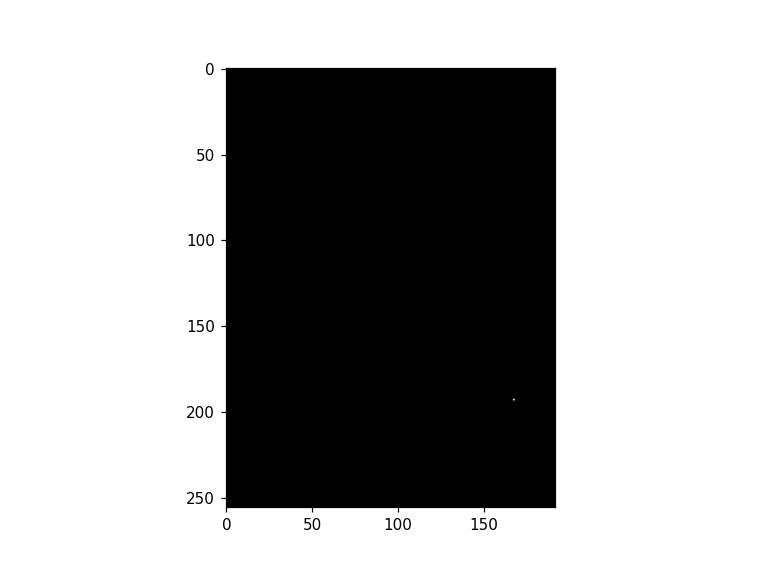

In [46]:
img = nifti_data[:,77,:]
img = (img - np.min(img)) / (np.max(img) - np.min(img))
plt.imshow(img>0.92,cmap='gray') 

In [13]:
point_cloud = np.array([0,0,0])
for i in range(nifti_data.shape[1]):
    img = nifti_data[:,i,:]
    img = (img - np.min(img)) / (np.max(img) - np.min(img))
    # get their coordinates and attach i
    white_pixels = img==1.0
    white_pixel_coords = np.array(np.where(white_pixels == 1)).transpose(1,0)
    if len(white_pixel_coords)==1:
        point_cloud = np.vstack((point_cloud, np.hstack( (white_pixel_coords, np.ones((white_pixel_coords.shape[0] , 1))*i ))))

<ipython-input-13-0edce31de92c>:4: RuntimeWarning: invalid value encountered in true_divide
  img = (img - np.min(img)) / (np.max(img) - np.min(img))


In [14]:
point_cloud

array([[  0.,   0.,   0.],
       [131.,  93.,  16.],
       [140.,  97.,  17.],
       [148.,  93.,  18.],
       [119., 112.,  19.],
       [159.,  86.,  20.],
       [125.,  99.,  21.],
       [125.,  99.,  22.],
       [143.,  99.,  23.],
       [142.,  96.,  24.],
       [121.,  96.,  25.],
       [112., 100.,  26.],
       [114.,  87.,  27.],
       [106.,  94.,  28.],
       [103.,  94.,  29.],
       [102.,  89.,  30.],
       [145.,  65.,  31.],
       [144.,  64.,  32.],
       [148.,  65.,  33.],
       [150.,  61.,  34.],
       [158.,  63.,  35.],
       [141.,  61.,  36.],
       [137., 141.,  37.],
       [148.,  54.,  38.],
       [145., 139.,  39.],
       [149., 144.,  40.],
       [148., 145.,  41.],
       [139., 145.,  42.],
       [145., 146.,  43.],
       [142., 146.,  44.],
       [213.,  88.,  45.],
       [213., 111.,  46.],
       [213., 115.,  47.],
       [ 87.,  60.,  48.],
       [ 74.,  74.,  49.],
       [214.,  75.,  50.],
       [217.,  80.,  51.],
 

<IPython.core.display.Javascript object>


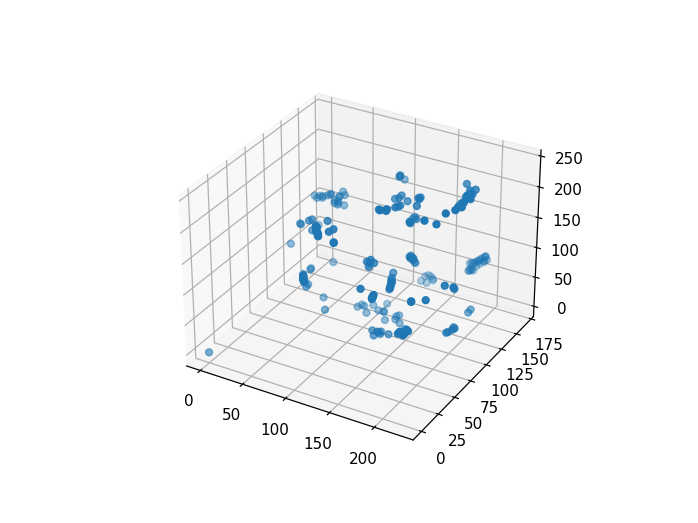

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(point_cloud[:,0], point_cloud[:,1], point_cloud[:,2], )

In [8]:
def dist(x,y):
    return np.sqrt(np.sum( (x-y)**2))

In [9]:
model = DBSCAN(eps=25, min_samples=10)
model.fit_predict(point_cloud)

array([-1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  2,  2,  2,  3,  2,  3,  2,  2,  2,
        3,  2,  2,  3,  3,  2,  3,  3,  3,  3,  3,  2,  3,  3,  4, -1,  4,
        4, -1,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  5, -1,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5, -1, -1,  6,  6,  6,  6,  6,  6,
        6,  6,  6, -1, -1,  6,  6,  6,  6,  6,  6, -1, -1, -1, -1, -1,  6,
        6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  8,  8, -1,  8,  8,  8,  8,  8,  8,  8,  8, -1,  8,  8,  8,
        8,  8,  8, -1,  8

In [40]:
mid = np.array([128, 88, 128])
smallest_dist=np.inf
best_point=None
best_point_id=-1
for idx, point in enumerate(point_cloud):
    if dist(point, mid)< smallest_dist:        
        smallest_dist = dist(point,mid)
        best_point=point
        best_point_id= idx
lead1 = best_point
# delete a cluster from which this point is
new_pc = point_cloud[model.labels_ != model.labels_[best_point_id]]

smallest_dist=np.inf
best_point=None
for point in new_pc:
    if dist(point, mid)< smallest_dist:        
        smallest_dist = dist(point,mid)
        best_point=point

lead2 = best_point

In [41]:
print(lead1)
print(lead2)

[147.  84. 111.]
[139.  66. 141.]


array([134.,  69., 117.])

In [317]:
best_point

array([134.,  69., 117.])

In [336]:
lead2

array([137., 105., 115.])

In [323]:
a,b = np.unique(model.labels_, return_counts=True)
sorted_clusters = np.array((a,b)).transpose(1,0)
sorted_clusters=sorted_clusters[sorted_clusters[:,1].argsort()]
l1, l2  = sorted_clusters[-3][0], sorted_clusters[-4][0]

In [324]:
sorted_clusters

array([[ 5, 11],
       [ 7, 14],
       [ 0, 15],
       [ 4, 15],
       [ 8, 20],
       [ 3, 23],
       [ 2, 24],
       [ 6, 25],
       [-1, 31],
       [ 1, 31]], dtype=int64)

<IPython.core.display.Javascript object>


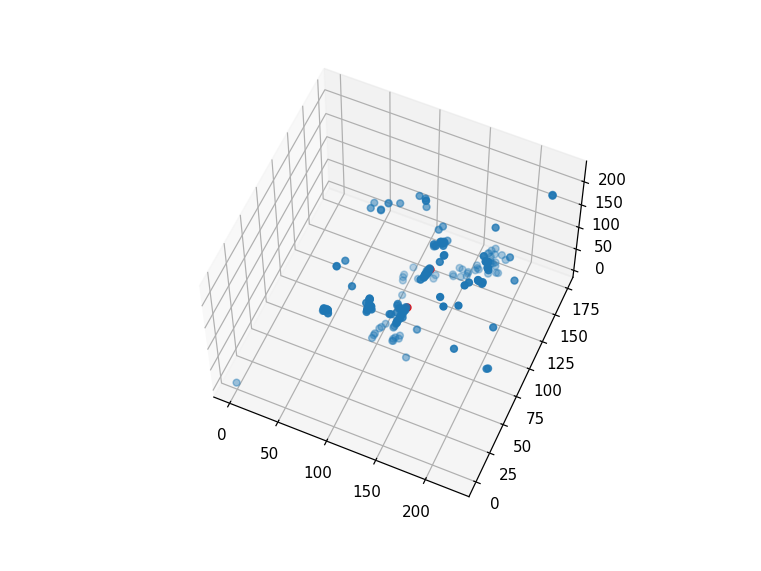

In [340]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(point_cloud[:,0], point_cloud[:,1], point_cloud[:,2], )
ax.scatter3D(lead1[0], lead1[1], lead1[2], c='r')
ax.scatter3D(lead2[0], lead2[1], lead2[2], c='r')

## Ideas:

1) Use template matching on y axis
2) Cluster classifer
3) Find a point closest to the midpoint

In [326]:
new_pc = point_cloud[take]
new_labels = model.labels_[take]
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(new_pc[:,0], new_pc[:,1], new_pc[:,2],s=20, c= new_labels)

ax.view_init(azim=200)
plt.show()

<IPython.core.display.Javascript object>

<ipython-input-326-1b68562674f7>:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


In [325]:
take = (model.labels_==l1) | (model.labels_==l2)

## Ground Truth

In [215]:
GT

array([[190., 163.,  37.],
       [ 63.,  89.,  43.],
       [200., 168., 126.],
       [ 66.,  89., 135.],
       [124.,  76.,  66.],
       [117.,  38.,  67.],
       [117.,  43.,  67.],
       [119.,  48.,  67.],
       [120.,  56.,  67.],
       [121.,  61.,  67.],
       [123.,  66.,  67.],
       [123.,  71.,  67.],
       [128.,  86.,  67.],
       [130.,  96.,  67.],
       [126.,  81.,  68.],
       [128.,  91.,  68.],
       [132., 106.,  68.],
       [134., 117.,  68.],
       [130., 101.,  69.],
       [133., 112.,  69.],
       [136., 106., 106.],
       [136., 112., 106.],
       [133.,  96., 108.],
       [132., 101., 108.],
       [130.,  86., 109.],
       [132.,  91., 109.],
       [130.,  81., 111.],
       [128.,  71., 112.],
       [129.,  76., 112.],
       [123.,  56., 114.],
       [125.,  61., 114.],
       [127.,  66., 115.],
       [119.,  48., 117.],
       [116.,  43., 118.]])

In [316]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=25, min_samples=10)
model.fit_predict(point_cloud)
pred = model.fit_predict(point_cloud)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(point_cloud[:,0], point_cloud[:,1], point_cloud[:,2], c=model.labels_, s=20)
ax.scatter(GT[:,0], GT[:,2], GT[:,1], c='r', s=20)
ax.scatter(best_point[0], best_point[1], best_point[2], c='r', s=20)

#ax.scatter(128, 88, 128,c='r')
ax.view_init(azim=200)
plt.show()

<IPython.core.display.Javascript object>

<ipython-input-316-d11aaf5da955>:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


In [318]:
GT

array([[190., 163.,  37.],
       [ 63.,  89.,  43.],
       [200., 168., 126.],
       [ 66.,  89., 135.],
       [124.,  76.,  66.],
       [117.,  38.,  67.],
       [117.,  43.,  67.],
       [119.,  48.,  67.],
       [120.,  56.,  67.],
       [121.,  61.,  67.],
       [123.,  66.,  67.],
       [123.,  71.,  67.],
       [128.,  86.,  67.],
       [130.,  96.,  67.],
       [126.,  81.,  68.],
       [128.,  91.,  68.],
       [132., 106.,  68.],
       [134., 117.,  68.],
       [130., 101.,  69.],
       [133., 112.,  69.],
       [136., 106., 106.],
       [136., 112., 106.],
       [133.,  96., 108.],
       [132., 101., 108.],
       [130.,  86., 109.],
       [132.,  91., 109.],
       [130.,  81., 111.],
       [128.,  71., 112.],
       [129.,  76., 112.],
       [123.,  56., 114.],
       [125.,  61., 114.],
       [127.,  66., 115.],
       [119.,  48., 117.],
       [116.,  43., 118.]])